In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-ghg-emissionsdata/co2_emission.csv


**Step 1: Select a real-world dataset**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/co2-ghg-emissionsdata/co2_emission.csv")  # Load dataset

In [4]:
df.head()  # Display first 5 rows

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


**Step 2: Perform data preparation & cleaning**

In [5]:
df.shape  # Shape of dataset (rows, cols)

(20853, 4)

In [6]:
df.info()  # Info about datatypes & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [7]:
df.isnull().sum()  # Missing values count

Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
dtype: int64

In [8]:
df.describe()  # Summary statistics for numeric columns

,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [9]:
df = df.dropna(subset=["Code"])  #Droping rows with missing values

In [10]:
df = df[df["Entity"] != "World"]

**Step 3: Perform exploratory analysis & visualization Matplotlib - Resources**

In [11]:
import matplotlib.pyplot as plt

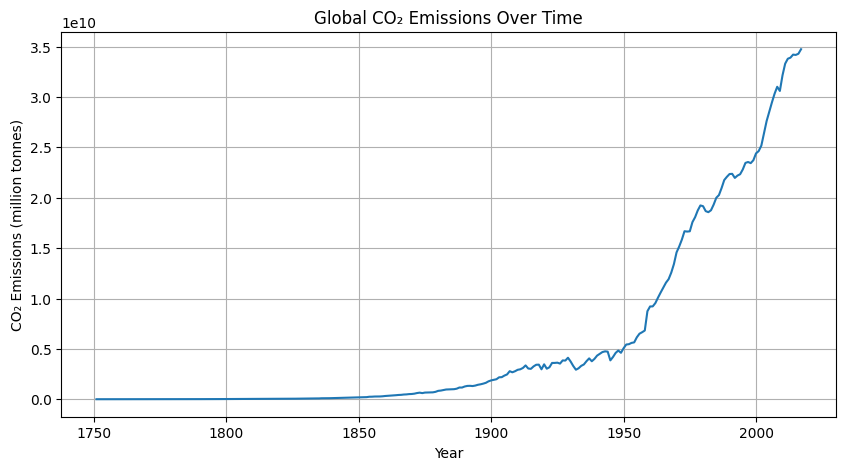

In [12]:
global_trend = df.groupby("Year")["Annual CO₂ emissions (tonnes )"].sum()
global_trend.plot(kind="line", figsize=(10,5))
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (million tonnes)")
plt.grid(True)
plt.show()

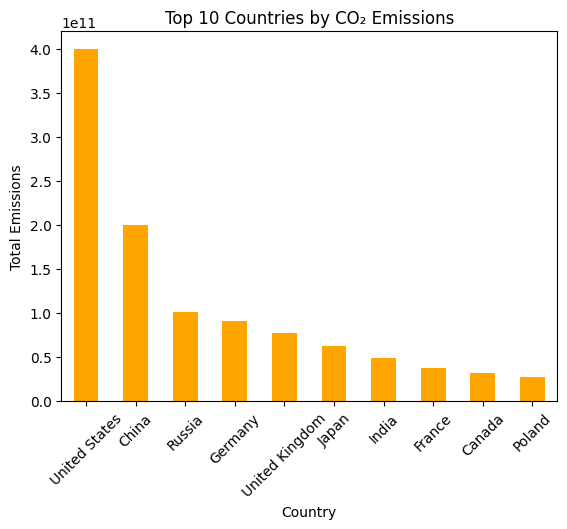

In [13]:
top_emitters = df.groupby("Entity")["Annual CO₂ emissions (tonnes )"].sum().sort_values(ascending=False).head(10)
top_emitters.plot(kind="bar", color="orange")
plt.title("Top 10 Countries by CO₂ Emissions")
plt.ylabel("Total Emissions")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

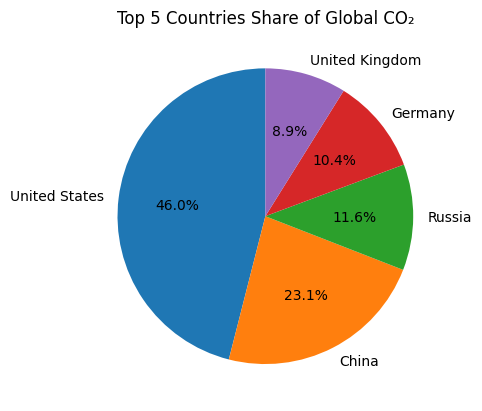

In [14]:
top5 = df.groupby("Entity")["Annual CO₂ emissions (tonnes )"].sum().sort_values(ascending=False).head(5)
top5.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Countries Share of Global CO₂")
plt.ylabel("")
plt.show()

**Step 4: Ask & answer questions about the data**

**Q1 Which country has emitted the most CO₂ overall?**

In [15]:
max_country = df.groupby("Entity")["Annual CO₂ emissions (tonnes )"].sum().idxmax()
print("Country with highest total CO₂ emissions:", max_country)

Country with highest total CO₂ emissions: United States


**Q2 How have global emissions changed over decades?**

In [16]:
df["Decade"] = (df["Year"] // 10) * 10
decade_trend = df.groupby("Decade")["Annual CO₂ emissions (tonnes )"].sum()
print(decade_trend)

Decade
1750    8.682581e+07
1760    1.139834e+08
1770    1.405400e+08
1780    1.759709e+08
1790    2.267503e+08
1800    3.341275e+08
1810    4.414937e+08
1820    5.917873e+08
1830    9.535523e+08
1840    1.488064e+09
1850    2.477084e+09
1860    4.168756e+09
1870    6.459588e+09
1880    9.972554e+09
1890    1.452979e+10
1900    2.327298e+10
1910    3.157319e+10
1920    3.592168e+10
1930    3.548856e+10
1940    4.515698e+10
1950    6.211509e+10
1960    1.092618e+11
1970    1.692382e+11
1980    1.995629e+11
1990    2.282232e+11
2000    2.781447e+11
2010    2.705707e+11
Name: Annual CO₂ emissions (tonnes ), dtype: float64


**Q3 Which continent/country group dominates emissions?**

In [17]:
if "Entity" in df.columns:
    continent_emissions = df.groupby("Entity")["Annual CO₂ emissions (tonnes )"].sum().sort_values(ascending=False)
    print(continent_emissions)

Entity
United States       3.993783e+11
China               2.001365e+11
Russia              1.005891e+11
Germany             9.056563e+10
United Kingdom      7.707106e+10
                        ...     
Montserrat          1.539754e+06
Christmas Island    1.330032e+06
Saint Helena        3.463088e+05
Niue                2.715786e+05
Tuvalu              2.569226e+05
Name: Annual CO₂ emissions (tonnes ), Length: 221, dtype: float64


**Step 5: Summarize your inferences & write a conclusion**


Rich countries have higher emissions per person.Coal, oil, and gas are the main sources of CO₂.Transport and factories produce a big share of emissions.Emissions dropped slightly during COVID-19.Europe and North America caused most past emissions.Asia’s fast growth has increased emissions a lot.Cutting fossil fuels is key to lowering emissions.
